In [1]:
import sys, os
sys.path.append(os.path.abspath('../..'))
import fridom.ShallowWater as sw

# GPU Acceleration
GPU Acceleration is turned on by default if cupy is installed. For instructions on how to install cupy, see the README.md file. It can be turned off in the Model Settings:

In [2]:
# turning off GPU acceleration:
mset = sw.ModelSettings(gpu=False, N=[255, 255])
grid = sw.Grid(mset)
model = sw.Model(mset, grid)
model.z = sw.InitialConditions.SingleWave(mset, grid)
model.run(runlen=1)
model.timer

100%|██████████| 500/500 [00:02<00:00, 235.43it/s]


 Timing Summary: 
Total Integration             : 00:00:02s   (100.0%)
Diagnostics                   : 00:00:00s   (0.0%)
Write Snapshot                : 00:00:00s   (0.0%)
Live Plotting                 : 00:00:00s   (0.0%)
Video Writer                  : 00:00:00s   (0.0%)
Total Tendency                : 00:00:01s   (71.1%)
Time Stepping                 : 00:00:00s   (27.3%)
Linear Tendency               : 00:00:00s   (22.5%)
Nonlinear Tendency            : 00:00:01s   (48.2%)
Harmonic Tendency             : 00:00:00s   (0.0%)
Biharmonic Tendency           : 00:00:00s   (0.0%)
Source Tendency               : 00:00:00s   (0.0%)

In [4]:
# For comparison, here is the same code with GPU acceleration:
mset = sw.ModelSettings(gpu=True, N=[255, 255])
grid = sw.Grid(mset)
model = sw.Model(mset, grid)
model.z = sw.InitialConditions.SingleWave(mset, grid)
model.run(runlen=1)
model.timer

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:02<00:00, 234.86it/s]


 Timing Summary: 
Total Integration             : 00:00:02s   (100.0%)
Diagnostics                   : 00:00:00s   (0.0%)
Write Snapshot                : 00:00:00s   (0.0%)
Live Plotting                 : 00:00:00s   (0.0%)
Video Writer                  : 00:00:00s   (0.0%)
Total Tendency                : 00:00:01s   (69.9%)
Time Stepping                 : 00:00:00s   (27.8%)
Linear Tendency               : 00:00:00s   (25.6%)
Nonlinear Tendency            : 00:00:00s   (44.0%)
Harmonic Tendency             : 00:00:00s   (0.0%)
Biharmonic Tendency           : 00:00:00s   (0.0%)
Source Tendency               : 00:00:00s   (0.0%)

In this example, the code with gpu acceleration is not faster then without. The advantage of gpu accelaration becomes visible at much larger Resolution, consider for example the same code as before but with a resolution of 2048x2048:

In [5]:
mset = sw.ModelSettings(gpu=True, N=[2**11-1, 2**11-1], dt=2**-11)
grid = sw.Grid(mset)
model = sw.Model(mset, grid)
model.z = sw.InitialConditions.SingleWave(mset, grid)
model.run(steps=1000)
model.timer

100%|██████████| 1000/1000 [00:07<00:00, 131.99it/s]


 Timing Summary: 
Total Integration             : 00:00:07s   (100.0%)
Diagnostics                   : 00:00:00s   (0.0%)
Write Snapshot                : 00:00:00s   (0.0%)
Live Plotting                 : 00:00:00s   (0.0%)
Video Writer                  : 00:00:00s   (0.0%)
Total Tendency                : 00:00:04s   (62.1%)
Time Stepping                 : 00:00:02s   (36.1%)
Linear Tendency               : 00:00:02s   (30.3%)
Nonlinear Tendency            : 00:00:02s   (31.6%)
Harmonic Tendency             : 00:00:00s   (0.0%)
Biharmonic Tendency           : 00:00:00s   (0.0%)
Source Tendency               : 00:00:00s   (0.0%)

# Benchmarking single GPU vs single CPU

  0%|          | 0/31 [00:00<?, ?it/s]

100%|██████████| 1023/1023 [01:54<00:00,  8.97it/s]


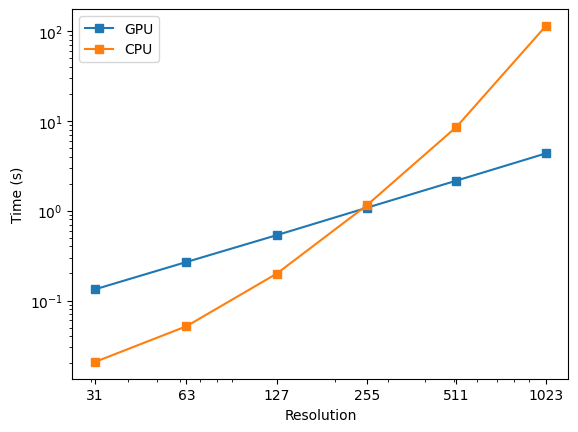

In [6]:
import time
import matplotlib.pyplot as plt

def model_time(res, gpu):
    mset = sw.ModelSettings(N=[res, res], dt=1/res, gpu=gpu)
    grid = sw.Grid(mset)
    m = sw.Model(mset, grid)
    m.z = sw.InitialConditions.SingleWave(mset, grid)
    start_time = time.time()
    m.run(runlen=1)
    return time.time() - start_time

resolutions = [2**i-1 for i in range(5, 11)]
gpu_times = [model_time(res, True) for res in resolutions]
cpu_times = [model_time(res, False) for res in resolutions]

plt.plot(resolutions, gpu_times, label="GPU", marker="s")
plt.plot(resolutions, cpu_times, label="CPU", marker="s")
plt.xlabel("Resolution")
plt.ylabel("Time (s)")
plt.xscale("log")
plt.yscale("log")
plt.xticks(resolutions, resolutions)
plt.legend()